In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [69]:
dataset = pd.read_csv("advertising.csv")
dataset.head(31)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [70]:
dataset.shape
dataset.isna().sum()
dataset.duplicated().any()

False

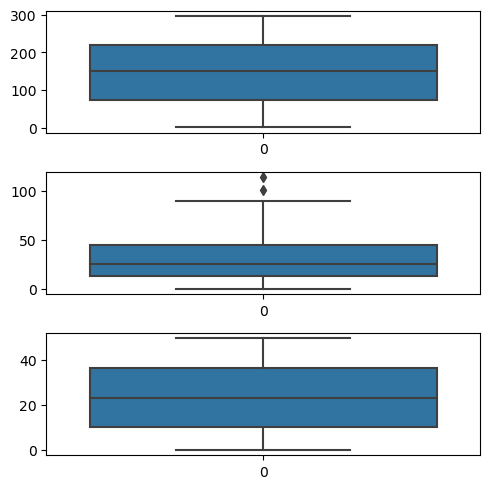

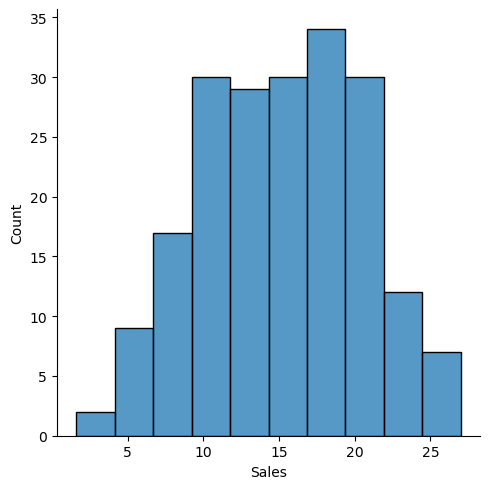

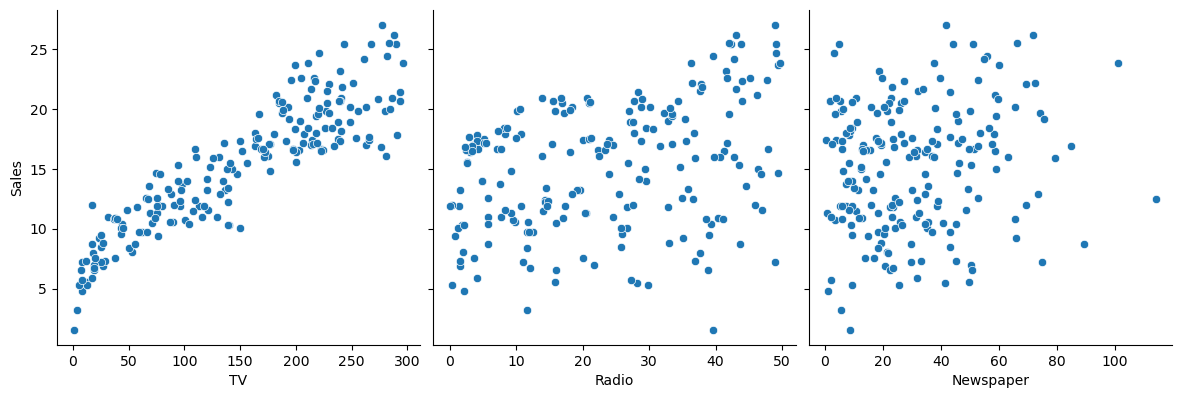

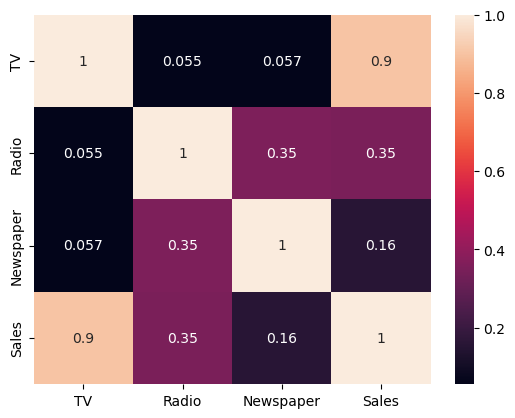

In [71]:
fig, axs = plt.subplots(3,figsize=(5,5))
plt1 = sns.boxplot(dataset["TV"], ax = axs[0])
plt2 = sns.boxplot(dataset["Newspaper"], ax = axs[1])
plt2 = sns.boxplot(dataset["Radio"], ax = axs[2])
plt.tight_layout()
sns.displot(dataset['Sales'])
sns.pairplot(dataset, x_vars = ['TV','Radio','Newspaper'], y_vars = 'Sales', height = 4, aspect =1, kind = 'scatter')
plt.show()
sns.heatmap(dataset.corr(), annot =True)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Intercept:  6.948683200001357
Coefficient:  [0.05454575]
Regression equation: Sales = 6.948 + 0.054*TV


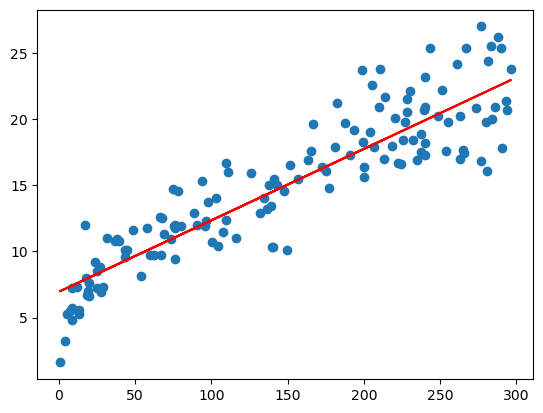

     Actual value  Predicted value
126           6.6         7.374140
104          20.7        19.941482
99           17.2        14.323269
92           19.4        18.823294
111          21.8        20.132392
167          17.2        18.228745
116          12.2        14.541452
96           16.7        17.726924
52           22.6        18.752384
69           22.3        18.774202
164          11.9        13.341445
124          19.7        19.466933
182           8.7        10.014155
154          20.6        17.192376
125          10.6        11.705073
196          14.0        12.086893
194          17.3        15.114182
177          16.7        16.232370
163          18.0        15.866914
31           11.9        13.106899
11           17.4        18.659656
73           11.0        14.006904
15           22.4        17.606923
41           17.1        16.603281
97           20.5        17.034193
128          24.7        18.965113
133          19.6        18.937840
82           11.3   

C:\Users\Sahyadri\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.00324536])

In [60]:
x = dataset[["TV"]]
y = dataset["Sales"]
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100)
slr = LinearRegression()
slr.fit(x_train, y_train)
print('Intercept: ', slr.intercept_)
print('Coefficient: ', slr.coef_)
print('Regression equation: Sales = 6.948 + 0.054*TV')
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

y_pred_slr = slr.predict(x_test)
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
print(slr_diff)
slr.predict([[56]])

In [62]:
from sklearn.metrics import r2_score

r2_value = slr.score(X, y)
r2_value = r2_score(y, slr.predict(X))

print(f"R-squared value of the model: {r2_value:.2f}")

R-squared value of the model: 0.81
